In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
train = pd.read_csv('train_data')
test = pd.read_csv('test_data')

In [3]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# test['Disease']=le.fit_transform(test['Disease'])

In [4]:
train_x = train.drop(['Disease'],axis=1)
train_y = train['Disease']

In [5]:
test_x = test.drop(['Disease'],axis=1)
test_y = test['Disease']

In [6]:
test_y

0      3
1      1
2      1
3      1
4      1
      ..
442    1
443    1
444    0
445    1
446    1
Name: Disease, Length: 447, dtype: int64

# K-Nearest Neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [9]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(test_x)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [12]:
print(classification_report(test_y, y_pred))


              precision    recall  f1-score   support

           0       0.17      0.37      0.24        84
           1       0.67      0.29      0.41       294
           2       0.03      0.40      0.06         5
           3       0.17      0.25      0.20        48
           4       0.00      0.00      0.00        16

    accuracy                           0.29       447
   macro avg       0.21      0.26      0.18       447
weighted avg       0.49      0.29      0.33       447



In [13]:
import matplotlib.pyplot as plt


In [14]:
cm = confusion_matrix(test_y, y_pred)


In [15]:
cmp = ConfusionMatrixDisplay(cm)


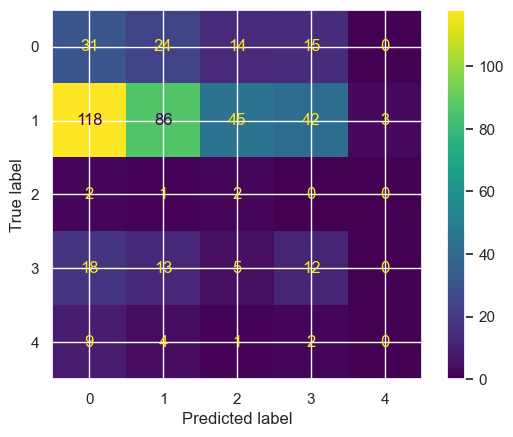

In [42]:
fig, ax = plt.subplots()
cmp.plot(ax=ax);

<Axes: >

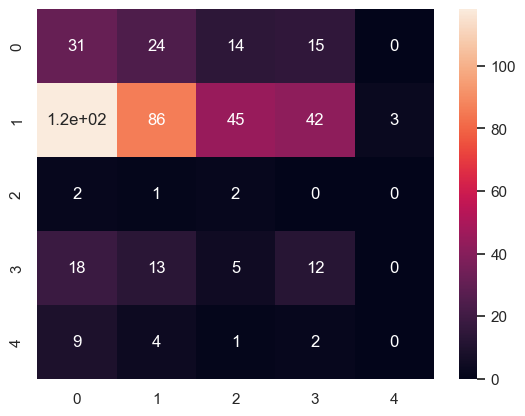

In [41]:
sns.heatmap(cm,annot=True)

In [48]:
 accuracy_score(test_y,y_pred)

0.2930648769574944

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [45]:
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [46]:
pred_dt = dt.predict(test_x)

In [47]:
print(classification_report(test_y, pred_dt))

              precision    recall  f1-score   support

           0       0.39      0.63      0.48        84
           1       0.75      0.39      0.52       294
           2       0.08      1.00      0.15         5
           3       0.30      0.50      0.38        48
           4       0.39      0.44      0.41        16

    accuracy                           0.46       447
   macro avg       0.38      0.59      0.39       447
weighted avg       0.62      0.46      0.49       447



In [51]:
accuracy_score(test_y,pred_dt)

0.45861297539149887

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [53]:
y_pred_rfc = forest_clf.predict(test_x)
accuracy_score(test_y,y_pred_rfc)

0.5212527964205816